In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
    running_acc = np.load(fp)

with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
    running_loss = np.load(fp)

with open('../params/2023520-213027-scaled-int-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss = np.load(fp)

# # because of some typo this operation needed
# running_loss[-1] = running_loss[-1] * 10

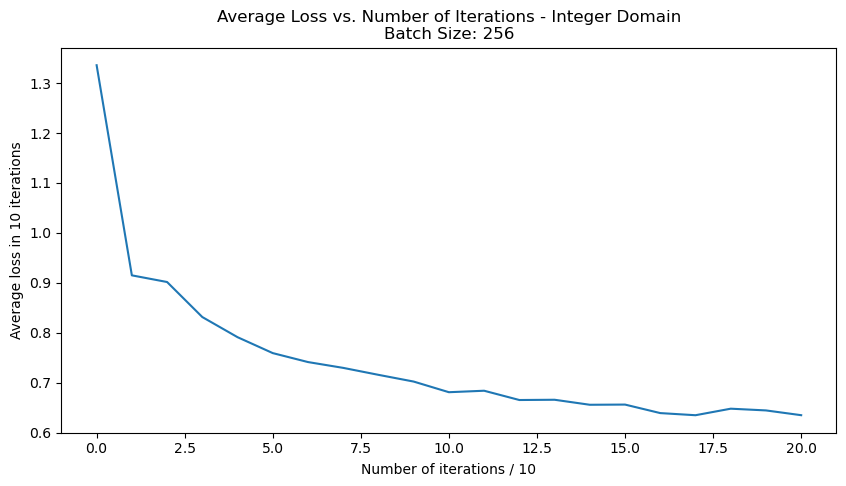

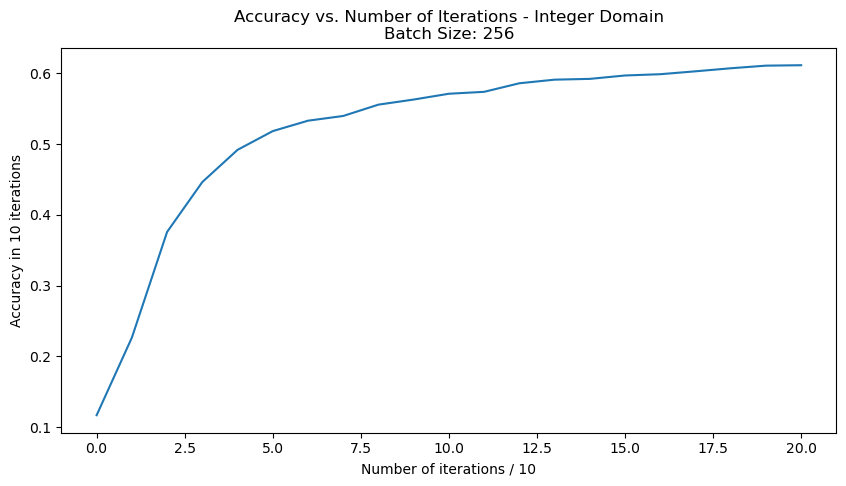

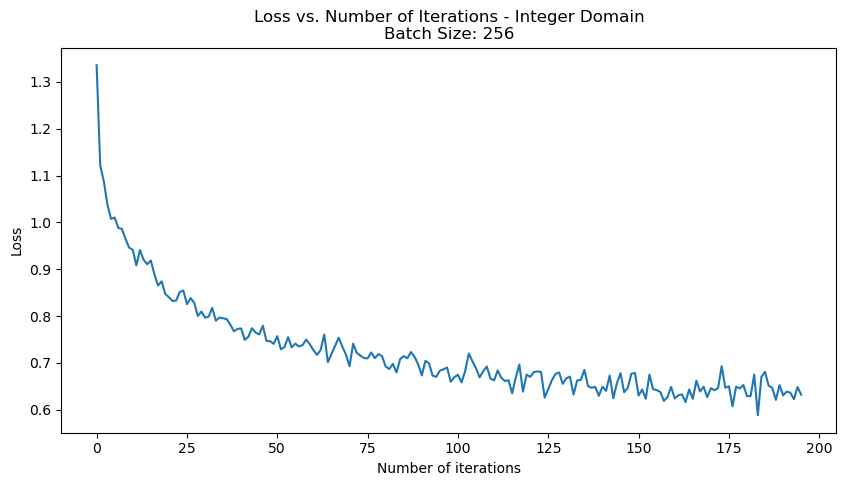

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss))), running_loss)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations - Integer Domain\nBatch Size: 256')
plt.savefig('avg_loss_int_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc))), running_acc)
plt.ylabel('Accuracy in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Accuracy vs. Number of Iterations - Integer Domain\nBatch Size: 256')
plt.savefig('acc_int_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss))), running_curr_loss)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - Integer Domain\nBatch Size: 256')
plt.savefig('loss_int_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

In [7]:
with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
    running_acc = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
    running_loss = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss = np.load(fp)

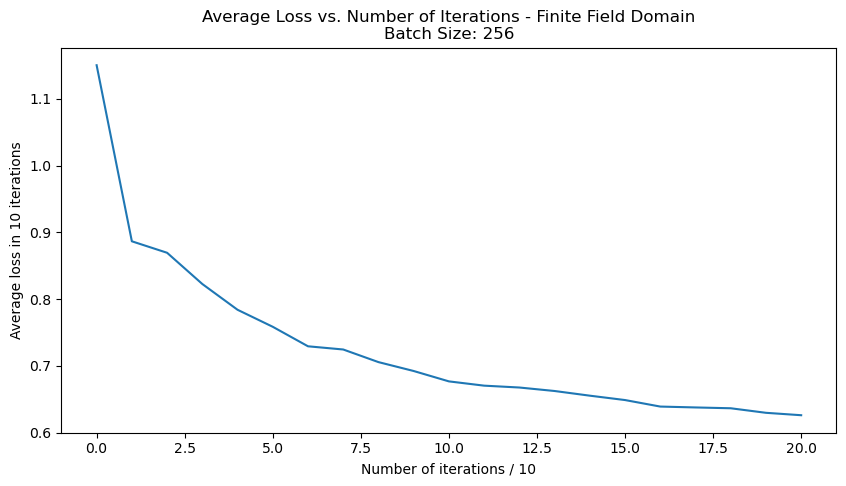

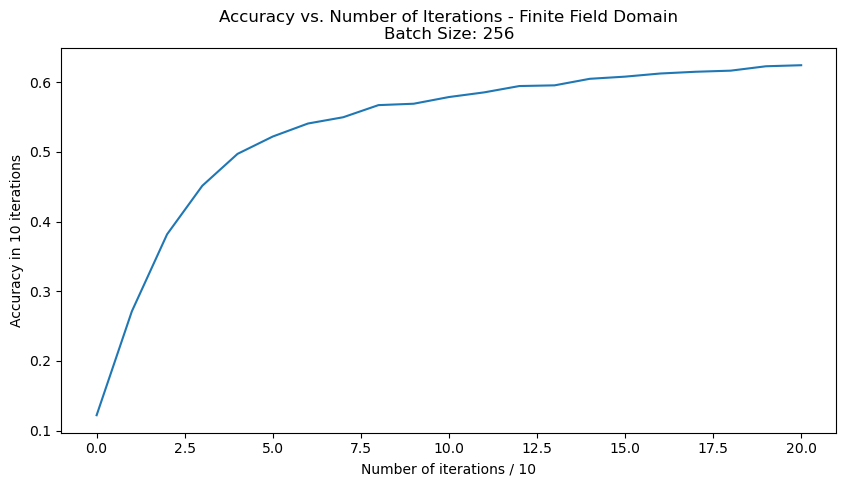

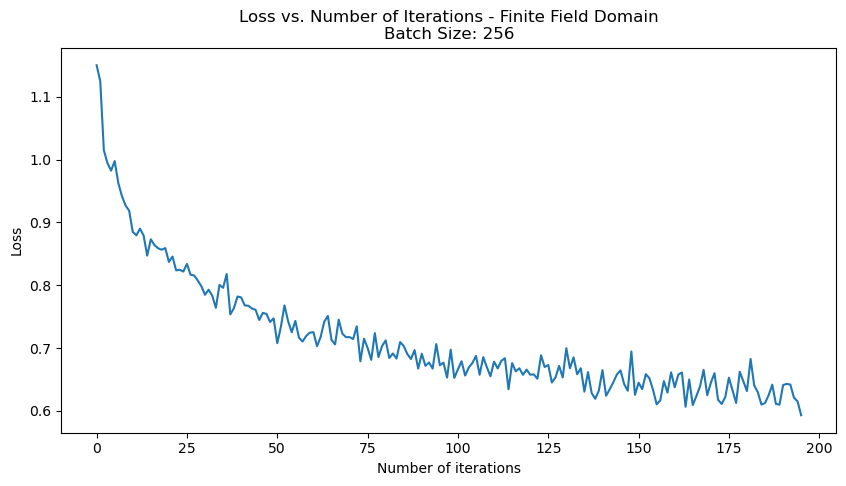

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss))), running_loss)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations - Finite Field Domain\nBatch Size: 256')
plt.savefig('avg_loss_ff_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc))), running_acc)
plt.ylabel('Accuracy in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Accuracy vs. Number of Iterations - Finite Field Domain\nBatch Size: 256')
plt.savefig('acc_ff_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss))), running_curr_loss)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - Finite Field Domain\nBatch Size: 256')
plt.savefig('loss_ff_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

In [1]:
import torch

In [11]:
checkpoint = torch.load('../params/net-vgg-cifar10.pth')

In [12]:
running_acc = checkpoint['running_acc']
running_loss = checkpoint['running_loss']
running_curr_loss = checkpoint['running_curr_loss']

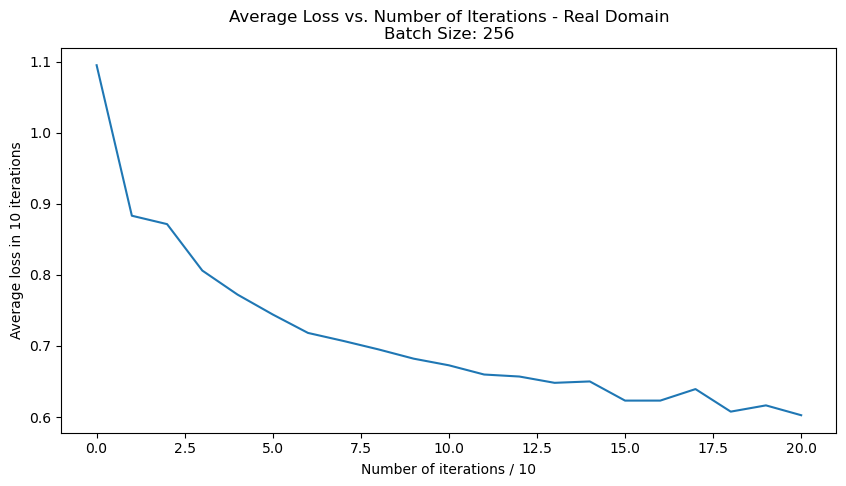

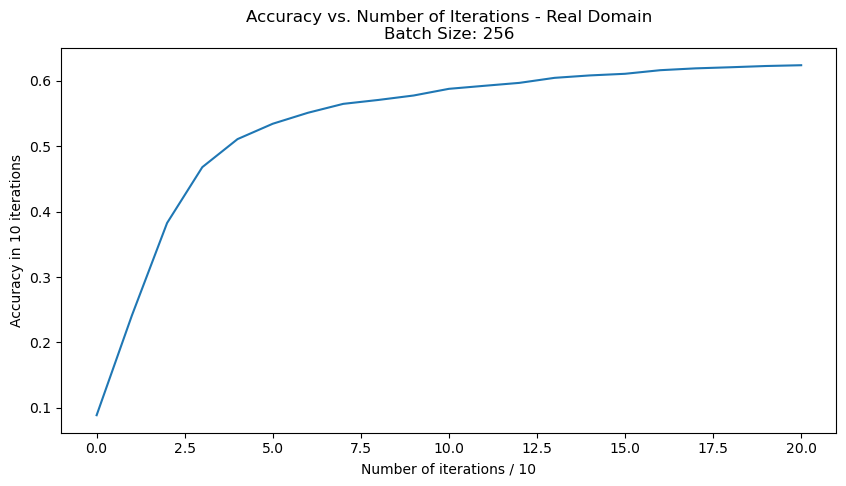

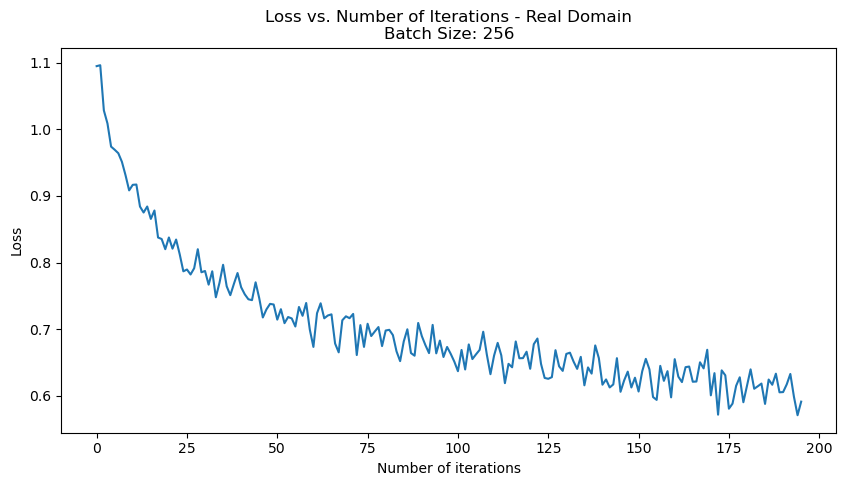

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss))), running_loss)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations - Real Domain\nBatch Size: 256')
plt.savefig('avg_loss_real_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc))), running_acc)
plt.ylabel('Accuracy in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Accuracy vs. Number of Iterations - Real Domain\nBatch Size: 256')
plt.savefig('acc_real_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss))), running_curr_loss)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - Real Domain\nBatch Size: 256')
plt.savefig('loss_real_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

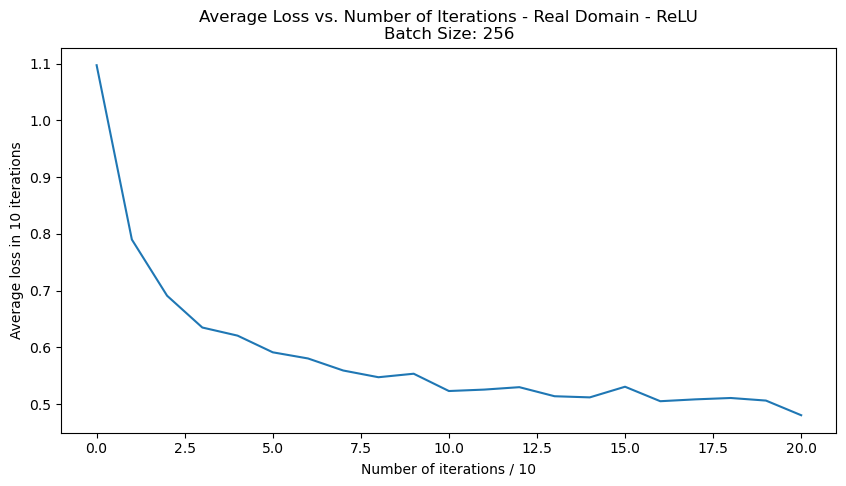

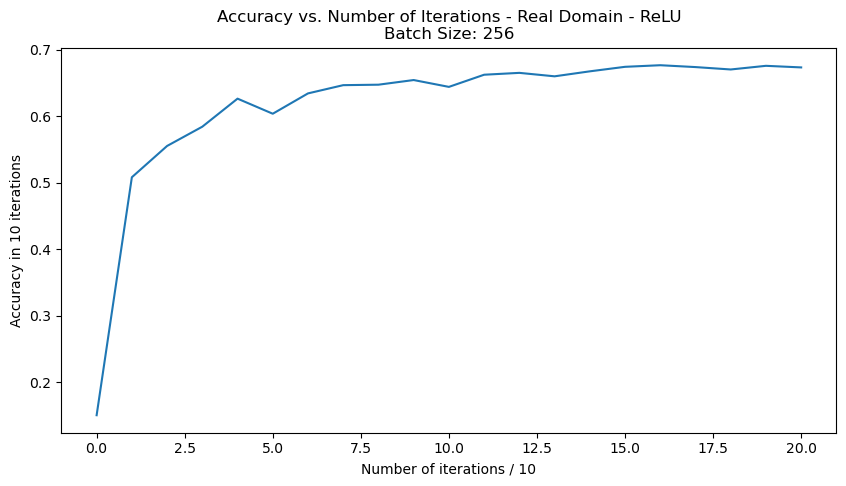

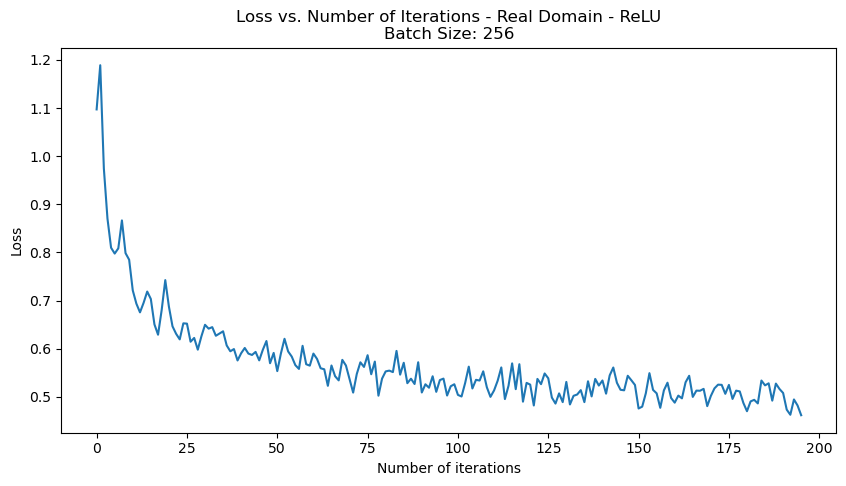

In [17]:
checkpoint = torch.load('../params/torch-vgg-cifar10.pth')
running_acc = checkpoint['running_acc']
running_loss = checkpoint['running_loss']
running_curr_loss = checkpoint['running_curr_loss']
plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss))), [x * 10 for x in running_loss])
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations - Real Domain - ReLU\nBatch Size: 256')
plt.savefig('avg_loss_real_batch_256_vgg_cifar10_relu.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
running_acc = [x.item() for x in running_acc]
plt.plot(list(range(len(running_acc))), running_acc)
plt.ylabel('Accuracy in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Accuracy vs. Number of Iterations - Real Domain - ReLU\nBatch Size: 256')
plt.savefig('acc_real_batch_256_vgg_cifar10_relu.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss))), [x * 10 for x in running_curr_loss])
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations - Real Domain - ReLU\nBatch Size: 256')
plt.savefig('loss_real_batch_256_vgg_cifar10_relu.jpg', dpi=300)
plt.show()

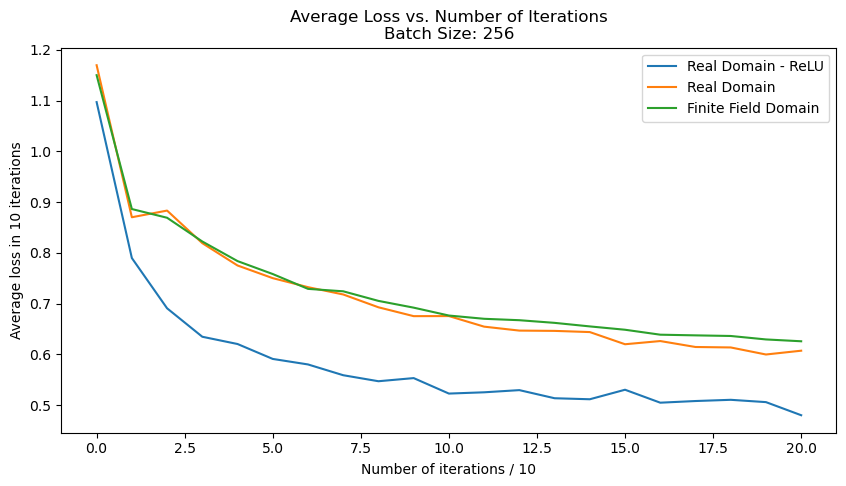

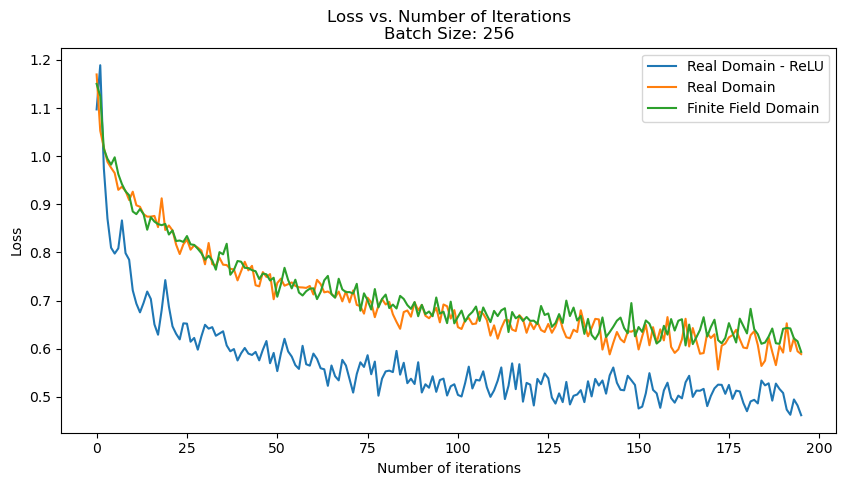

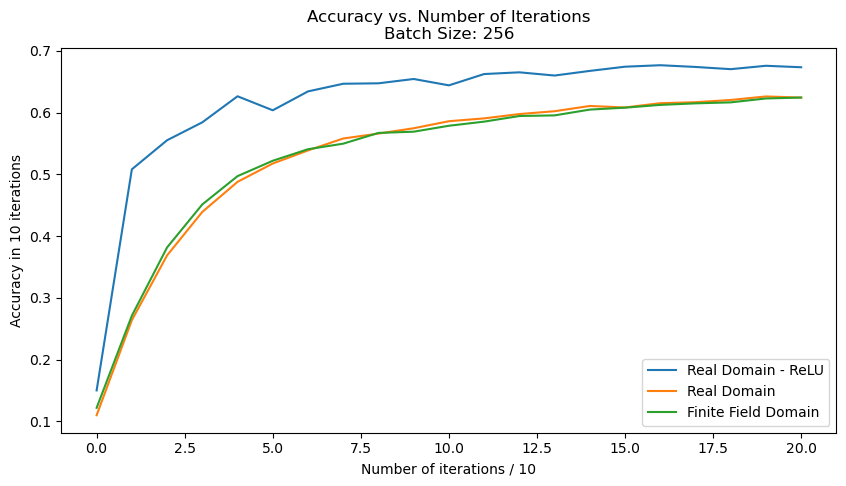

In [18]:
checkpoint = torch.load('../params/torch-vgg-cifar10.pth')
running_acc_relu = checkpoint['running_acc']
running_acc_relu = [x.item() for x in running_acc_relu]
running_loss_relu = checkpoint['running_loss']
running_curr_loss_relu = checkpoint['running_curr_loss']
checkpoint = torch.load('../params/net-vgg-cifar10.pth')
running_acc_net = checkpoint['running_acc']
running_loss_net = checkpoint['running_loss']
running_curr_loss_net = checkpoint['running_curr_loss']
with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_acc.npy', 'rb') as fp:
    running_acc_ff = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_loss.npy', 'rb') as fp:
    running_loss_ff = np.load(fp)

with open('../params/2023520-214235-scaled-ff-numpy-vgg-cifar10/running_curr_loss.npy', 'rb') as fp:
    running_curr_loss_ff = np.load(fp)

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_loss_relu))), [x * 10 for x in running_loss_relu])
plt.plot(list(range(len(running_loss_net))), running_loss_net)
plt.plot(list(range(len(running_loss_ff))), running_loss_ff)
plt.ylabel('Average loss in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Average Loss vs. Number of Iterations\nBatch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('avg_loss_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_curr_loss_relu))), [x * 10 for x in running_curr_loss_relu])
plt.plot(list(range(len(running_curr_loss_net))), running_curr_loss_net)
plt.plot(list(range(len(running_curr_loss_ff))), running_curr_loss_ff)
plt.ylabel('Loss')
plt.xlabel('Number of iterations')
plt.title('Loss vs. Number of Iterations\nBatch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='upper right')
plt.savefig('loss_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(list(range(len(running_acc_relu))), running_acc_relu)
plt.plot(list(range(len(running_acc_net))), running_acc_net)
plt.plot(list(range(len(running_acc_ff))), running_acc_ff)
plt.ylabel('Accuracy in 10 iterations')
plt.xlabel('Number of iterations / 10')
plt.title('Accuracy vs. Number of Iterations\nBatch Size: 256')
plt.legend(['Real Domain - ReLU', 'Real Domain', 'Finite Field Domain'], loc='lower right')
plt.savefig('acc_batch_256_vgg_cifar10.jpg', dpi=300)
plt.show()